In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import plotly.io as pio

In [2]:
! ls ../data/

MIG_EMP_EDUCATION_22022024161838929.csv
NRC-Emotion-Lexicon-Wordlevel-v0.92.txt
countries_codes_and_coordinates.csv
employment_birth_education.xls
employment_birth_sex.csv
inflows of foreign population by nationality.csv
inward_remittance_flows_december_2023_1.xlsx


In [2]:
employment_by_gender_birth = pd.read_csv("../data/employment_birth_sex.csv")
employment_by_gender_birth.head()

,COUNTRY,Country,BIRTH,Place of birth,GENDER,Gender,RATE,Rate,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2000,2000,PC,Percentage,0,Units,NaN,NaN,74.0,NaN,NaN
1,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2001,2001,PC,Percentage,0,Units,NaN,NaN,73.9,NaN,NaN
2,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2002,2002,PC,Percentage,0,Units,NaN,NaN,74.0,NaN,NaN
3,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2003,2003,PC,Percentage,0,Units,NaN,NaN,74.1,NaN,NaN
4,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2004,2004,PC,Percentage,0,Units,NaN,NaN,75.6,NaN,NaN


In [3]:
employment_by_gender_birth['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

In [4]:
employment_by_gender_birth['Country'] = employment_by_gender_birth['Country'].str.strip()

In [5]:
employment_by_gender_birth['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czechia', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic',
       'Spain', 'Sweden', 'Switzerland', 'Türkiye', 'United Kingdom',
       'United States', 'Chile', 'Estonia', 'Israel', 'Slovenia',
       'OECD - Total', 'Latvia', 'Lithuania'], dtype=object)

In [6]:
employment_by_gender_birth['COUNTRY'] = employment_by_gender_birth['COUNTRY'].str.strip()
top_immigrating_countries = ['Australia', 'United States', 'Germany', 'Italy', 'Canada']
OECD_total = employment_by_gender_birth[employment_by_gender_birth['Country'] != "OECD - Total"]

select_total = employment_by_gender_birth[employment_by_gender_birth['Country'].isin(top_immigrating_countries)]


In [7]:
select_total['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

In [8]:
select_total.head()

,COUNTRY,Country,BIRTH,Place of birth,GENDER,Gender,RATE,Rate,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2000,2000,PC,Percentage,0,Units,NaN,NaN,74.0,NaN,NaN
1,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2001,2001,PC,Percentage,0,Units,NaN,NaN,73.9,NaN,NaN
2,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2002,2002,PC,Percentage,0,Units,NaN,NaN,74.0,NaN,NaN
3,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2003,2003,PC,Percentage,0,Units,NaN,NaN,74.1,NaN,NaN
4,AUS,Australia,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2004,2004,PC,Percentage,0,Units,NaN,NaN,75.6,NaN,NaN


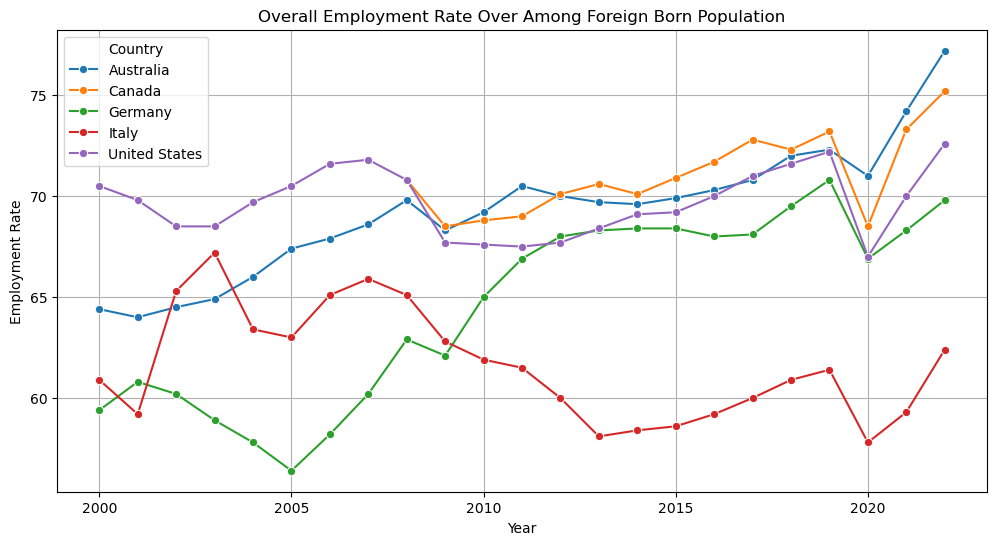

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

employment_rate_countries = select_total[(select_total['Gender'] == 'Total') & 
                                         (select_total['Rate'] == "Employment rate") & 
                                         (select_total['BIRTH'] == 'FB')]

plt.figure(figsize=(12, 6))
sns.lineplot(data=employment_rate_countries, x='Year', y='Value', hue='Country', marker='o')
plt.title('Overall Employment Rate Over Among Foreign Born Population')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.grid(True)
plt.legend(title='Country')
plt.savefig('../results/employment_rates_among_FB.png', dpi=300, bbox_inches='tight')
plt.show()

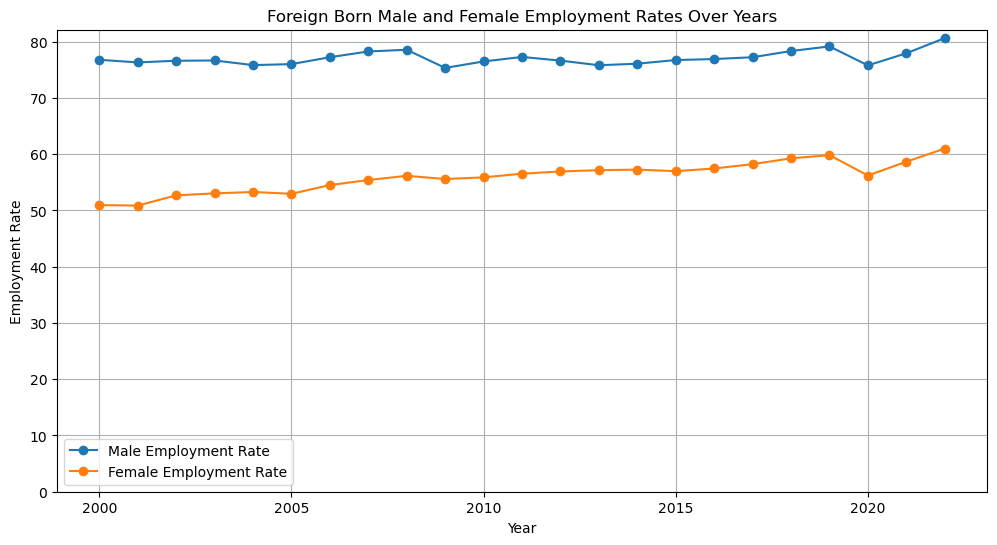

In [23]:
# Filter the data for male employment rate
male_employment_rate = select_total[(select_total['RATE'] == "N_RATE") & 
                                    (select_total['Gender'] == 'Men') & 
                                    (select_total['BIRTH'] == 'FB')]

# Filter the data for female employment rate
female_employment_rate = select_total[(select_total['RATE'] == "N_RATE") & 
                                      (select_total['Gender'] == 'Women') & 
                                      (select_total['BIRTH'] == 'FB')]

# Calculate the mean employment rate for each year
male_employment_rate = male_employment_rate.groupby('Year')['Value'].mean().reset_index()
female_employment_rate = female_employment_rate.groupby('Year')['Value'].mean().reset_index()

# Plot the male and female employment rates
plt.figure(figsize=(12, 6))
plt.plot(male_employment_rate['Year'], male_employment_rate['Value'], marker='o', label='Male Employment Rate')
plt.plot(female_employment_rate['Year'], female_employment_rate['Value'], marker='o', label='Female Employment Rate')

plt.ylim(0)
plt.title('Foreign Born Male and Female Employment Rates Over Years')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.grid(True)
plt.legend()
plt.savefig('../results/employment_rates_among_FB_gender.png', dpi=300, bbox_inches='tight')
plt.show()


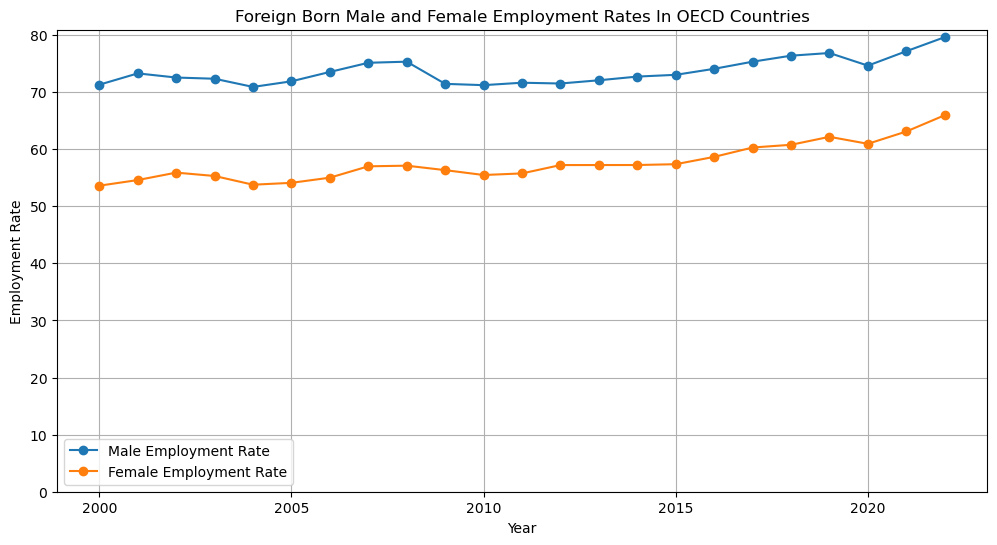

In [33]:
plt.figure(figsize=(12, 6))

male_employment_rate = OECD_total[(OECD_total['RATE'] == "N_RATE") & (OECD_total['Gender'] == 'Men') & (OECD_total['BIRTH'] == 'FB')]
male_employment_rate = male_employment_rate.groupby('Year')['Value'].mean()
plt.plot(male_employment_rate.index, male_employment_rate.values, marker='o', label='Male Employment Rate')

female_employment_rate = OECD_total[(OECD_total['RATE'] == "N_RATE") & (OECD_total['Gender'] == 'Women') & (OECD_total['BIRTH'] == 'FB')]
female_employment_rate = female_employment_rate.groupby('Year')['Value'].mean()
plt.plot(female_employment_rate.index, female_employment_rate.values, marker='o', label='Female Employment Rate')

plt.ylim(0) 
plt.title('Foreign Born Male and Female Employment Rates In OECD Countries')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.grid(True)
plt.legend()
plt.savefig('../results/employment_rates_among_FB_gender.png', dpi=300, bbox_inches='tight')
plt.show()


# Time Series of Employment Among Foreign Borns in USA.

In [59]:
employment_by_gender_birth['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czechia', 'Denmark',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic',
       'Spain', 'Sweden', 'Switzerland', 'Türkiye', 'United Kingdom',
       'United States', 'Chile', 'Estonia', 'Israel', 'Slovenia',
       'OECD - Total', 'Latvia', 'Lithuania'], dtype=object)

In [93]:
OECD_emp = OECD_total[["Year", "Gender", "Value"]]

In [94]:
# excluding total gender
OECD_emp = OECD_emp[OECD_emp["Gender"] != "Total"]
OECD_emp = OECD_emp.groupby(['Gender', 'Year']).agg({'Value': 'mean'}).reset_index()

In [74]:
OECD_emp

,Gender,Year,Value
0,Men,2001,52.833333
1,Men,2002,53.500000
2,Men,2003,53.333333
3,Men,2004,52.666667
4,Men,2005,53.000000
5,Men,2006,52.833333
6,Men,2007,52.333333
7,Men,2008,53.500000
8,Men,2009,53.666667
9,Men,2010,53.666667


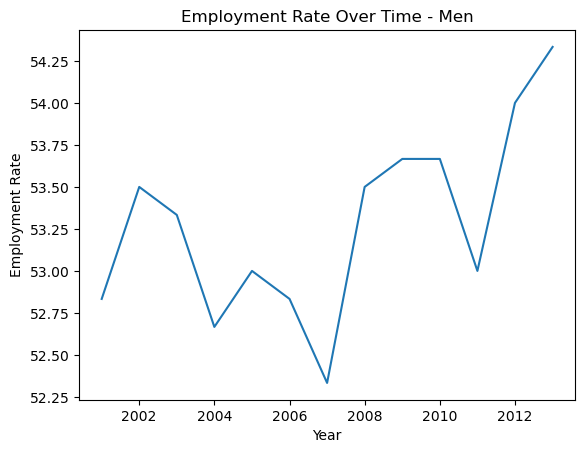

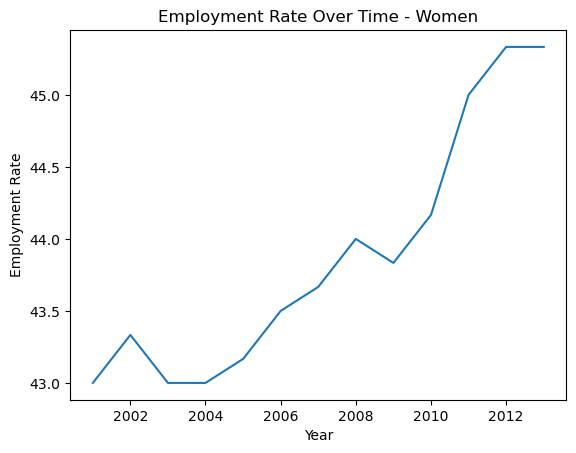

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Convert 'Year' to datetime format and set it as the index
OECD_emp['Year'] = pd.to_datetime(OECD_emp['Year'], format='%Y')
OECD_emp.set_index('Year', inplace=True)

# Visualize the time series data for Men
men_data = OECD_emp[OECD_emp['Gender'] == 'Men']

plt.plot(men_data['Value'])
plt.title('Employment Rate Over Time - Men')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.show()

# Visualize the time series data for Women
women_data = OECD_emp[OECD_emp['Gender'] == 'Women']

plt.plot(women_data['Value'])
plt.title('Employment Rate Over Time - Women')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parame

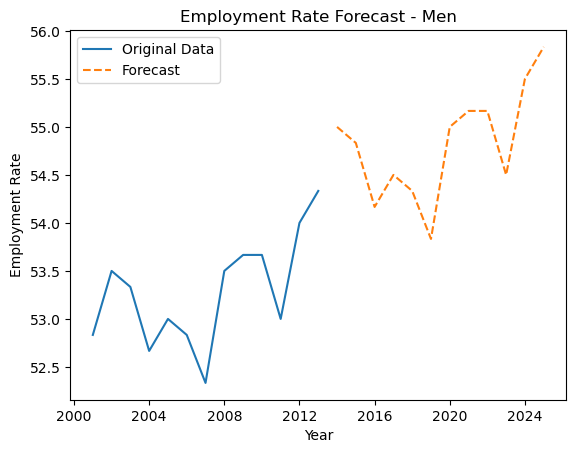

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parame

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


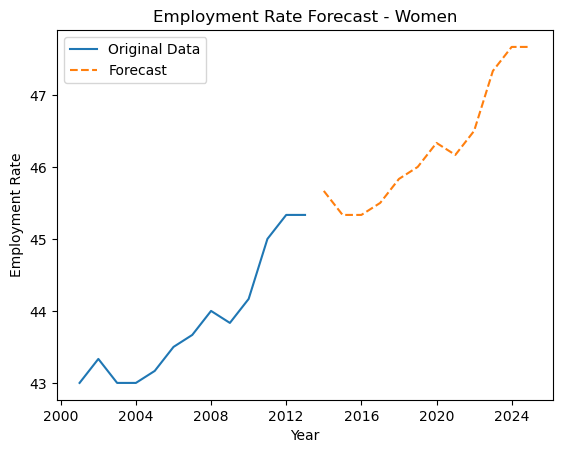

In [64]:
# Function to train SARIMA model
def train_sarima(data, order, seasonal_order):
    model = SARIMAX(data['Value'], order=order, seasonal_order=seasonal_order)
    results = model.fit()
    return results

# Function to plot original data and forecast
def plot_forecast(data, results, label):
    forecast_steps = 12
    forecast = results.get_forecast(steps=forecast_steps)

    plt.plot(data['Value'], label='Original Data')
    plt.plot(forecast.predicted_mean, label='Forecast', linestyle='dashed')
    plt.title(f'Employment Rate Forecast - {label}')
    plt.xlabel('Year')
    plt.ylabel('Employment Rate')
    plt.legend()
    plt.show()

# Train and plot forecast for Men
order_men = (1, 1, 1)  # Adjust as needed
seasonal_order_men = (1, 1, 1, 12)  # 12 for yearly seasonality
results_men = train_sarima(men_data, order_men, seasonal_order_men)
plot_forecast(men_data, results_men, 'Men')

# Train and plot forecast for Women
order_women = (1, 1, 1)  # Adjust as needed
seasonal_order_women = (1, 1, 1, 12)  # 12 for yearly seasonality, adjust as needed
results_women = train_sarima(women_data, order_women, seasonal_order_women)
plot_forecast(women_data, results_women, 'Women')

In [100]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Fitting a linear regression to data for Men
OECD_emp_men = OECD_emp[OECD_emp['Gender'] == 'Men']

# Separate data into training and testing sets
train_data_men = OECD_emp_men[OECD_emp_men['Year'] < 2005]
test_data_men = OECD_emp_men[OECD_emp_men['Year'] >= 2005]

# Splitting features and target variable
X_train_men = train_data_men[['Year', 'Value']]
y_train_men = train_data_men['Value']
X_test_men = test_data_men[['Year', 'Value']]
y_test_men = test_data_men['Value']

# Fitting the linear regression model
regression_men = LinearRegression().fit(X_train_men, y_train_men)

# Making predictions on the test set
emp_pred_men = regression_men.predict(X_test_men)
test_data_men['prediction'] = emp_pred_men

# Evaluating the model performance
mse_men = mean_squared_error(y_test_men, emp_pred_men)
r2_men = r2_score(y_test_men, emp_pred_men)

print("Mean squared error for Men: %.3f" % mse_men)
print("Coefficient of determination (R^2) for Men: %.3f" % r2_men)


Mean squared error for Women: 0.000
Coefficient of determination (R^2) for Women: 1.000


/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_30530/3305039090.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_women['prediction'] = emp_pred_women


In [85]:
test_data_men

,Gender,Year,Value,prediction
4,Men,2005,53.000000,53.000000
5,Men,2006,52.833333,52.833333
6,Men,2007,52.333333,52.333333
7,Men,2008,53.500000,53.500000
8,Men,2009,53.666667,53.666667
9,Men,2010,53.666667,53.666667
10,Men,2011,53.000000,53.000000
11,Men,2012,54.000000,54.000000
12,Men,2013,54.333333,54.333333


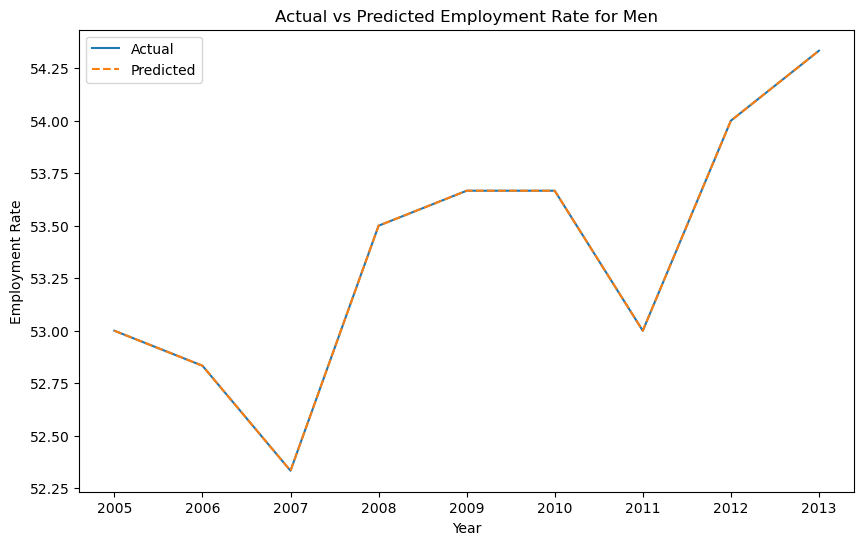

In [99]:
# Plotting actual vs predicted values for Men
# Plotting actual vs predicted values for Men
plt.figure(figsize=(10, 6))
plt.plot(test_data_men['Year'], test_data_men['Value'], label='Actual')
plt.plot(test_data_men['Year'], test_data_men['prediction'], label='Predicted', linestyle='dashed')
plt.title('Actual vs Predicted Employment Rate for Men')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.legend()
plt.show()

In [97]:
OECD_emp

,Gender,Year,Value
0,Men,2001,52.833333
1,Men,2002,53.500000
2,Men,2003,53.333333
3,Men,2004,52.666667
4,Men,2005,53.000000
5,Men,2006,52.833333
6,Men,2007,52.333333
7,Men,2008,53.500000
8,Men,2009,53.666667
9,Men,2010,53.666667


In [101]:
# Fitting a linear regression to data for Women
OECD_emp_women = OECD_emp[OECD_emp['Gender'] == 'Women']

# Separate data into training and testing sets
train_data_women = OECD_emp_women[OECD_emp_women['Year'] < 2005]
test_data_women = OECD_emp_women[OECD_emp_women['Year'] >= 2005]

# Splitting features and target variable
X_train_women = train_data_women[['Year', 'Value']]
y_train_women = train_data_women['Value']
X_test_women = test_data_women[['Year', 'Value']]
y_test_women = test_data_women['Value']

# Fitting the linear regression model
regression_women = LinearRegression().fit(X_train_women, y_train_women)

# Making predictions on the test set
emp_pred_women = regression_women.predict(X_test_women)
test_data_women['prediction'] = emp_pred_women

# Evaluating the model performance
mse_women = mean_squared_error(y_test_women, emp_pred_women)
r2_women = r2_score(y_test_women, emp_pred_women)

print("Mean squared error for Women: %.3f" % mse_women)
print("Coefficient of determination (R^2) for Women: %.3f" % r2_women)


Mean squared error for Women: 0.000
Coefficient of determination (R^2) for Women: 1.000


/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_30530/3305039090.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_women['prediction'] = emp_pred_women


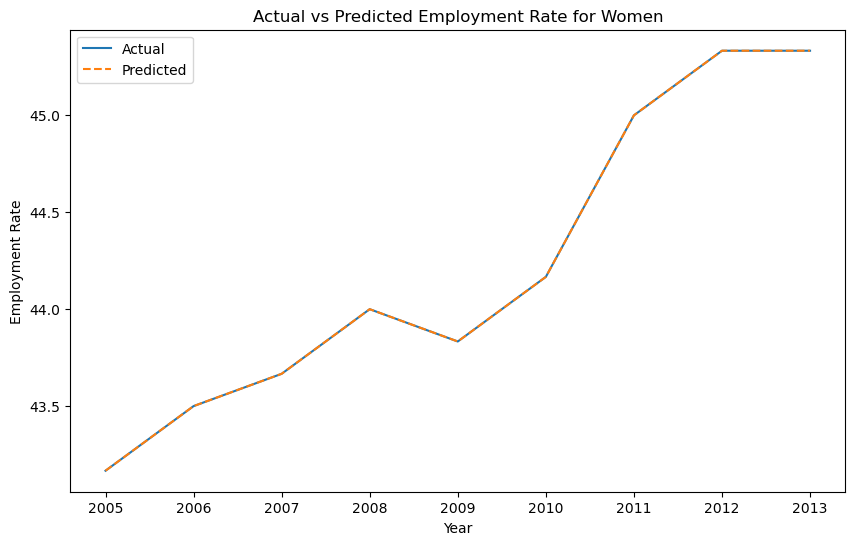

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(test_data_women['Year'], test_data_women['Value'], label='Actual')
plt.plot(test_data_women['Year'], test_data_women['prediction'], label='Predicted', linestyle='dashed')
plt.title('Actual vs Predicted Employment Rate for Women')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parame

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
MSE for Men: 68.59960968285343
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bou

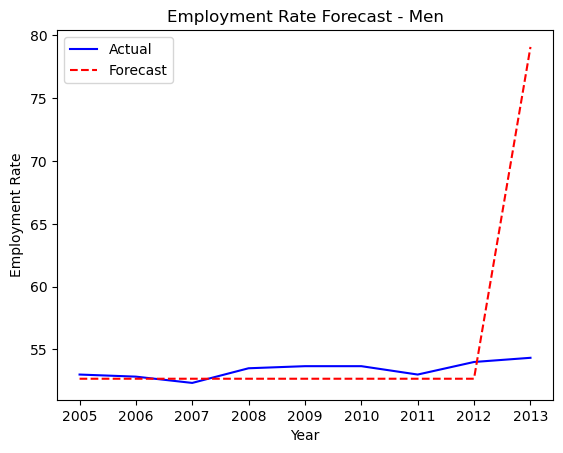

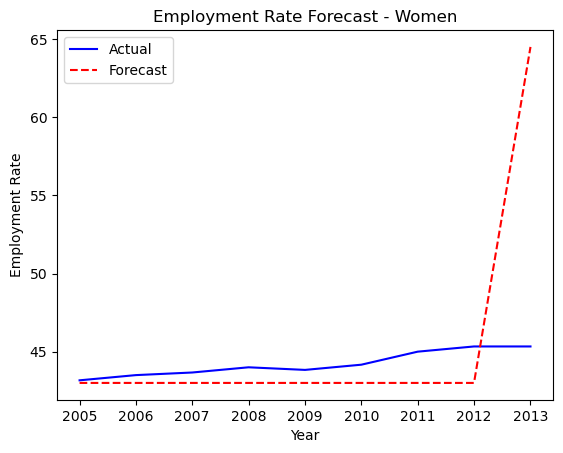

In [65]:
from sklearn.metrics import mean_squared_error
# Split data into train and test sets
train_data = OECD_emp.loc[OECD_emp.index < '2005']
test_data = OECD_emp.loc[OECD_emp.index >= '2005']

# Function to train SARIMA model
def train_sarima(data, order, seasonal_order):
    model = SARIMAX(data['Value'], order=order, seasonal_order=seasonal_order)
    results = model.fit()
    return results

# Function to evaluate SARIMA model
def evaluate_sarima(model, test_data):
    forecast_steps = len(test_data)
    forecast = model.forecast(steps=forecast_steps)
    mse = mean_squared_error(test_data['Value'], forecast)
    return mse

# Train SARIMA model for Men
order_men = (1, 1, 1)  # Adjust as needed
seasonal_order_men = (1, 1, 1, 12)  # Adjust as needed
model_men = train_sarima(train_data[train_data['Gender'] == 'Men'], order_men, seasonal_order_men)

# Evaluate SARIMA model for Men
mse_men = evaluate_sarima(model_men, test_data[test_data['Gender'] == 'Men'])
print("MSE for Men:", mse_men)

# Train SARIMA model for Women
order_women = (1, 1, 1)  # Adjust as needed
seasonal_order_women = (1, 1, 1, 12)  # Adjust as needed
model_women = train_sarima(train_data[train_data['Gender'] == 'Women'], order_women, seasonal_order_women)

# Evaluate SARIMA model for Women
mse_women = evaluate_sarima(model_women, test_data[test_data['Gender'] == 'Women'])
print("MSE for Women:", mse_women)

# Plot forecasts for Men
forecast_steps = len(test_data[test_data['Gender'] == 'Men'])
forecast_men = model_men.forecast(steps=forecast_steps)
plt.plot(test_data[test_data['Gender'] == 'Men']['Value'], label='Actual', color='blue')
plt.plot(test_data[test_data['Gender'] == 'Men'].index, forecast_men, label='Forecast', linestyle='dashed', color='red')
plt.title('Employment Rate Forecast - Men')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.legend()
plt.show()

# Plot forecasts for Women
forecast_women = model_women.forecast(steps=forecast_steps)
plt.plot(test_data[test_data['Gender'] == 'Women']['Value'], label='Actual', color='blue')
plt.plot(test_data[test_data['Gender'] == 'Women'].index, forecast_women, label='Forecast', linestyle='dashed', color='red')
plt.title('Employment Rate Forecast - Women')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.legend()
plt.show()


In [17]:
print(f"{employment_in_usa.head()}\n{employment_in_usa.tail()}")


      Year        Country Gender  Value
5311  2000  United States    Men   82.4
5312  2001  United States    Men   81.4
5313  2002  United States    Men   80.1
5314  2003  United States    Men   80.2
5315  2004  United States    Men   81.6
       Year        Country Gender  Value
11613  2018  United States  Women   65.6
11614  2019  United States  Women   66.4
11615  2020  United States  Women   62.5
11616  2021  United States  Women   64.5
11617  2022  United States  Women   66.0


Employment Over Time

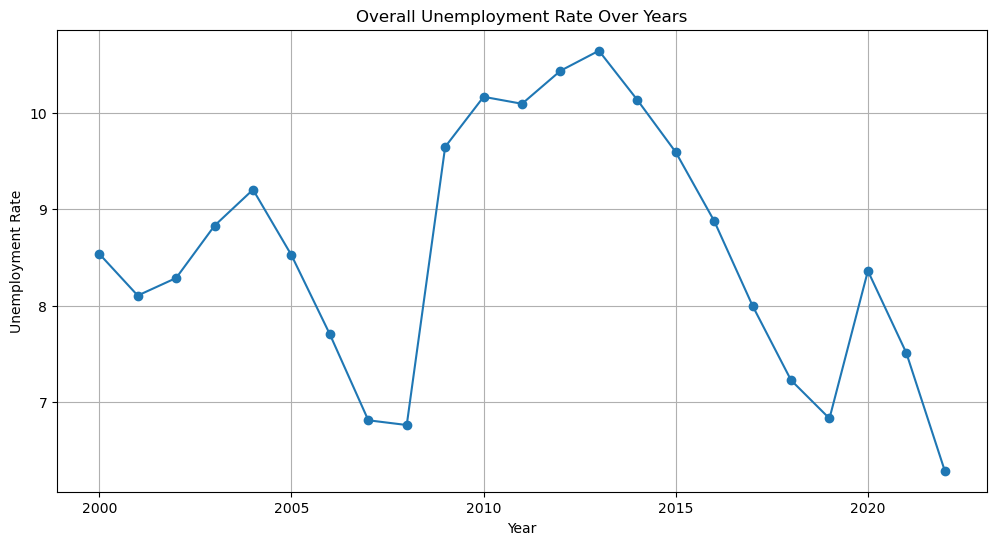

In [78]:
overall_unemployment_rate = employment_by_gender_birth[(employment_by_gender_birth['Gender'] == 'Total') & (employment_by_gender_birth['Rate'] == "Unemployment rate")]
overall_unemployment_rate = overall_unemployment_rate.groupby('Year')['Value'].mean()

plt.figure(figsize=(12, 6))
plt.plot(overall_unemployment_rate.index, overall_unemployment_rate.values, marker='o')
plt.title('Overall Unemployment Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.show()



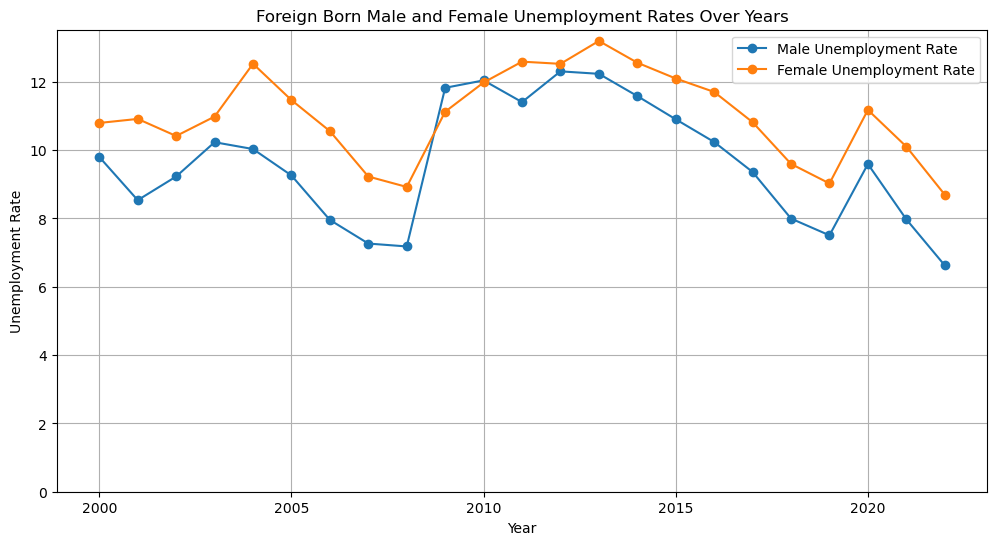

In [88]:
plt.figure(figsize=(12, 6))

male_unemployment_rate = employment_by_gender_birth[(employment_by_gender_birth['Rate'] == "Unemployment rate") & (employment_by_gender_birth['Gender'] == 'Men') & (employment_by_gender_birth['BIRTH'] == 'FB')]
male_unemployment_rate = male_unemployment_rate.groupby('Year')['Value'].mean()
plt.plot(male_unemployment_rate.index, male_unemployment_rate.values, marker='o', label='Male Unemployment Rate')

female_unemployment_rate = employment_by_gender_birth[(employment_by_gender_birth['Rate'] == "Unemployment rate") & (employment_by_gender_birth['Gender'] == 'Women') & (employment_by_gender_birth['BIRTH'] == 'FB')]
female_unemployment_rate = female_unemployment_rate.groupby('Year')['Value'].mean()
plt.plot(female_unemployment_rate.index, female_unemployment_rate.values, marker='o', label='Female Unemployment Rate')

plt.ylim(0)  # Start the y-axis from 0
plt.title('Foreign Born Male and Female Unemployment Rates Over Years')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.legend()
plt.show()


# employment rate among foreign born population in top migrating countries in 2022

In [3]:
employment_by_gender_birth = employment_by_gender_birth[employment_by_gender_birth['RATE'] == "N_RATE"]


In [9]:
employment_by_gender_birth = employment_by_gender_birth.sort_values(by='Value', ascending=False)
top_5_countries = ['United States', 'Italy', 'Kora', 'Germany']
top_5 = employment_by_gender_birth[employment_by_gender_birth['Country'].isin(top_5_countries)]
top_5_22 = top_5[(top_5['Year'] == 2022) & (top_5["Gender"] != 'Total')]
# top_5 = top_5.head()

In [10]:
top_5_22

,COUNTRY,Country,BIRTH,Place of birth,GENDER,Gender,RATE,Rate,YEAR,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
5333,USA,United States,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,83.2,NaN,NaN
7818,DEU,Germany,NB,Native-born,MEN,Men,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,81.3,NaN,NaN
1606,DEU,Germany,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,78.1,NaN,NaN
2636,ITA,Italy,FB,Foreign-born,MEN,Men,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,77.4,NaN,NaN
7887,DEU,Germany,NB,Native-born,WMN,Women,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,76.6,NaN,NaN
11548,USA,United States,NB,Native-born,MEN,Men,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,72.9,NaN,NaN
8853,ITA,Italy,NB,Native-born,MEN,Men,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,68.0,NaN,NaN
11617,USA,United States,NB,Native-born,WMN,Women,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,66.0,NaN,NaN
5402,USA,United States,FB,Foreign-born,WMN,Women,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,62.2,NaN,NaN
1675,DEU,Germany,FB,Foreign-born,WMN,Women,N_RATE,Employment rate,2022,2022,PC,Percentage,0,Units,NaN,NaN,61.2,NaN,NaN


In [17]:
top_5_22['BIRTH'].unique()

array(['FB', 'NB'], dtype=object)

<Figure size 1500x1000 with 0 Axes>

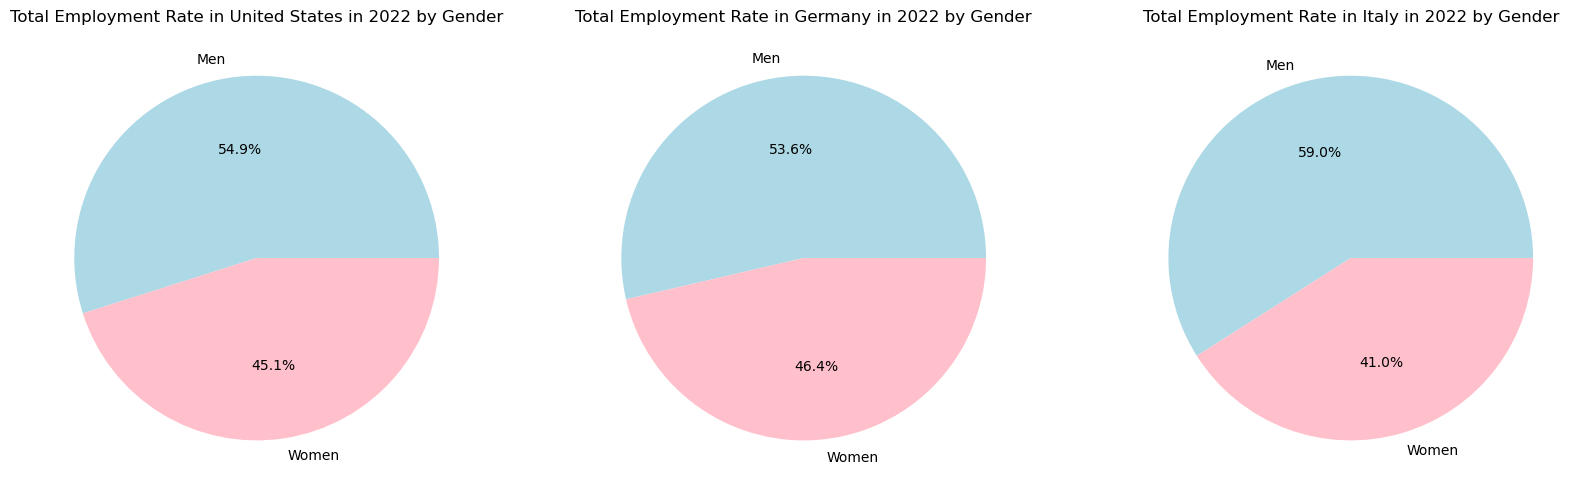

In [20]:
# employment rate among foreign born population in top imigrating countries in 2022
plt.figure(figsize=(15, 10))

countries = top_5_22['Country'].unique()

fig, axs = plt.subplots(1, len(countries), figsize=(20, 6))

for i, country in enumerate(countries):
    country_data = top_5_22[top_5_22['Country'] == country]
    employment_rate = country_data[country_data['Rate'] == 'Employment rate']
    employment_rate = employment_rate.groupby('Gender')['Value'].sum()
    
    axs[i].pie(employment_rate.values, labels=employment_rate.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])
    axs[i].set_title(f'Total Employment Rate in {country} in 2022 by Gender')

plt.show()


